<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_6/Classification/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [6]:
# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

## **First Model**

In [7]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
Total params: 629,732
Trainable params: 629,732
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 19s 23ms/step - loss: 7.1061 - accuracy: 0.0089 - val_loss: 5.6100 - val_accuracy: 0.0077
Epoch 2/20
800/800 [==============================] - 19s 23ms/step - loss: 5.5055 - accuracy: 0.0098 - val_loss: 5.4294 - val_accuracy: 0.0077
Epoch 3/20
800/800 [==============================] - 18s 22ms/step - loss: 5.4088 - accuracy: 0.0092 - val_loss: 5.4054 - val_accuracy: 0.0077
Epoch 4/20
800/800 [==============================] - 18s 23ms/step - loss: 5.3754 - accuracy: 0.0106 - val_loss: 5.3715 - val_accuracy: 0.0077
Epoch 5/20
800/800 [==============================] - 18s 22ms/step - loss: 5.3591 - accuracy: 0.0100 - val_loss: 5.3454 - val_accuracy: 0.0077
Epoch 6/20
800/800 [==============================] - 18s 22ms/step - loss: 5.3539 - accuracy: 0.0089 - val_loss: 5.3667 - val_accuracy: 0.0077
Epoch 7/20
800/800 [==============================] - 18s 22ms/step - loss: 5.3531 - accuracy: 0.0104 - val_loss: 5.3563 - val_accuracy:

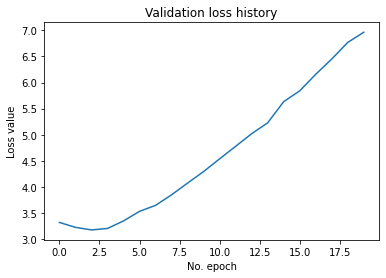

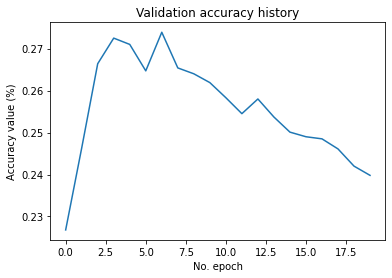

In [9]:
# Visualize history
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

### **First Model with Regularization**

In [17]:
# Create the model
import keras
model2 = Sequential()

model2.add(keras.Input(shape=input_shape))  
model2.add(Conv2D(32, 5,kernel_regularizer="l1_l2", strides=2, activation="relu"))
model2.add(Flatten())
model2.add(Dense(no_classes,kernel_regularizer="l1_l2", activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               627300    
Total params: 629,732
Trainable params: 629,732
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f2 = model2.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model2.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 19s 24ms/step - loss: 7.1298 - accuracy: 0.0085 - val_loss: 5.6241 - val_accuracy: 0.0084
Epoch 2/20
800/800 [==============================] - 20s 25ms/step - loss: 5.5203 - accuracy: 0.0098 - val_loss: 5.4521 - val_accuracy: 0.0077
Epoch 3/20
800/800 [==============================] - 19s 23ms/step - loss: 5.4380 - accuracy: 0.0103 - val_loss: 5.4410 - val_accuracy: 0.0077
Epoch 4/20
800/800 [==============================] - 19s 24ms/step - loss: 5.4128 - accuracy: 0.0099 - val_loss: 5.4126 - val_accuracy: 0.0077
Epoch 5/20
800/800 [==============================] - 19s 24ms/step - loss: 5.3993 - accuracy: 0.0103 - val_loss: 5.3857 - val_accuracy: 0.0077
Epoch 6/20
800/800 [==============================] - 19s 23ms/step - loss: 5.3907 - accuracy: 0.0092 - val_loss: 5.3972 - val_accuracy: 0.0077
Epoch 7/20
800/800 [==============================] - 19s 24ms/step - loss: 5.3845 - accuracy: 0.0098 - val_loss: 5.3896 - val_accuracy:

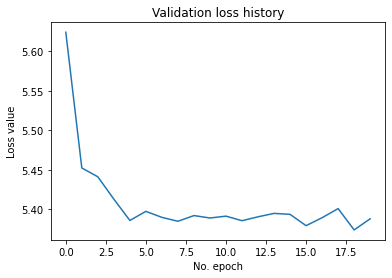

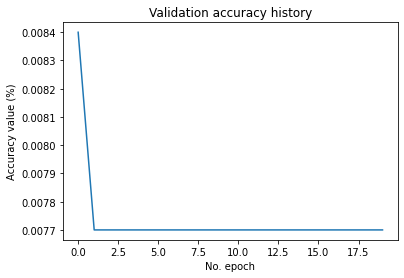

In [19]:
# Visualize history
# Plot history: Loss
plt.plot(history_f2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **First Model with Data Augmentation**

In [20]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(input_train)

In [21]:
history_f3=model.fit_generator(datagen.flow(input_train, target_train, batch_size=128),
                    steps_per_epoch = len(input_train) / 128, epochs=20, validation_data=(input_test, target_test))

Epoch 1/20
391/390 [==============================] - 41s 105ms/step - loss: 5.3531 - accuracy: 0.0100 - val_loss: 5.3592 - val_accuracy: 0.0100
Epoch 2/20
391/390 [==============================] - 39s 99ms/step - loss: 5.3531 - accuracy: 0.0092 - val_loss: 5.3437 - val_accuracy: 0.0100
Epoch 3/20
391/390 [==============================] - 39s 101ms/step - loss: 5.3531 - accuracy: 0.0091 - val_loss: 5.3560 - val_accuracy: 0.0100
Epoch 4/20
391/390 [==============================] - 38s 98ms/step - loss: 5.3530 - accuracy: 0.0097 - val_loss: 5.3516 - val_accuracy: 0.0100
Epoch 5/20
391/390 [==============================] - 38s 98ms/step - loss: 5.3530 - accuracy: 0.0090 - val_loss: 5.3584 - val_accuracy: 0.0100
Epoch 6/20
391/390 [==============================] - 39s 99ms/step - loss: 5.3530 - accuracy: 0.0090 - val_loss: 5.3606 - val_accuracy: 0.0100
Epoch 7/20
391/390 [==============================] - 40s 101ms/step - loss: 5.3531 - accuracy: 0.0084 - val_loss: 5.3480 - val_accura

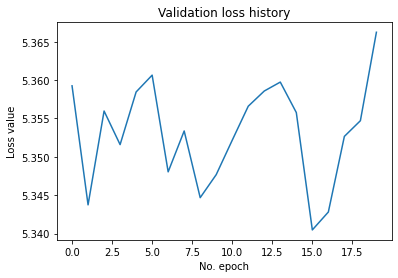

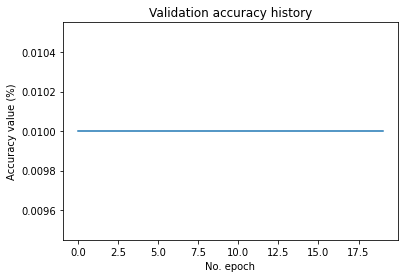

In [30]:
# Visualize history
# Plot history: Loss
plt.plot(history_f3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Compare Models**

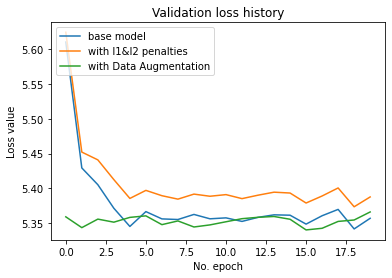

In [36]:
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.plot(history_f2.history['val_loss'])
plt.plot(history_f3.history['val_loss'])

plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

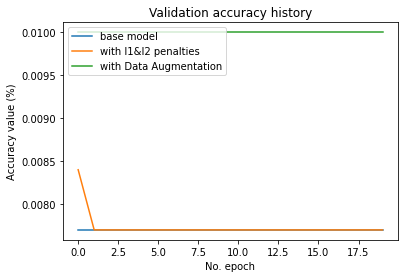

In [37]:
# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

## **Second Model**

In [22]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [23]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_s1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/10
800/800 [==============================] - 57s 71ms/step - loss: 4.2913 - accuracy: 0.0335 - val_loss: 4.1412 - val_accuracy: 0.0547
Epoch 2/10
800/800 [==============================] - 56s 71ms/step - loss: 3.9887 - accuracy: 0.0752 - val_loss: 3.8991 - val_accuracy: 0.0924
Epoch 3/10
800/800 [==============================] - 57s 71ms/step - loss: 3.7978 - accuracy: 0.1089 - val_loss: 3.7144 - val_accuracy: 0.1244
Epoch 4/10
800/800 [==============================] - 57s 71ms/step - loss: 3.5965 - accuracy: 0.1415 - val_loss: 3.5496 - val_accuracy: 0.1537
Epoch 5/10
800/800 [==============================] - 57s 71ms/step - loss: 3.4507 - accuracy: 0.1702 - val_loss: 3.4405 - val_accuracy: 0.1737
Epoch 6/10
800/800 [==============================] - 57s 71ms/step - loss: 3.3257 - accuracy: 0.1930 - val_loss: 3.3608 - val_accuracy: 0.1880
Epoch 7/10
800/800 [==============================] - 57s 71ms/step - loss: 3.2147 - accuracy: 0.2130 - val_loss: 3.2499 - val_accuracy:

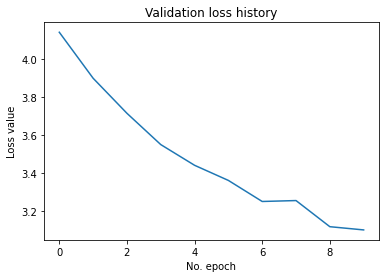

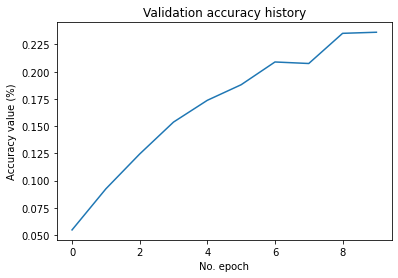

In [24]:
# Visualize history
# Plot history: Loss
plt.plot(history_s1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model with Regularization**

In [25]:
# Create the model
model2 = Sequential()
model2.add(Conv2D(32,kernel_regularizer="l1_l2", kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_regularizer="l1_l2",kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_regularizer="l1_l2",kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256,kernel_regularizer="l1_l2", activation='relu'))
model2.add(Dense(128, kernel_regularizer="l1_l2",activation='relu'))
model2.add(Dense(no_classes,kernel_regularizer="l1_l2", activation='softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [26]:
# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_s2 = model2.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model2.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/10
800/800 [==============================] - 61s 76ms/step - loss: 6.7893 - accuracy: 0.0092 - val_loss: 5.0535 - val_accuracy: 0.0083
Epoch 2/10
800/800 [==============================] - 60s 75ms/step - loss: 5.0092 - accuracy: 0.0094 - val_loss: 4.9809 - val_accuracy: 0.0077
Epoch 3/10
800/800 [==============================] - 59s 74ms/step - loss: 4.9731 - accuracy: 0.0094 - val_loss: 4.9698 - val_accuracy: 0.0077
Epoch 4/10
800/800 [==============================] - 59s 74ms/step - loss: 4.9616 - accuracy: 0.0100 - val_loss: 4.9615 - val_accuracy: 0.0077
Epoch 5/10
800/800 [==============================] - 59s 74ms/step - loss: 4.9555 - accuracy: 0.0101 - val_loss: 4.9539 - val_accuracy: 0.0077
Epoch 6/10
800/800 [==============================] - 59s 74ms/step - loss: 4.9528 - accuracy: 0.0104 - val_loss: 4.9539 - val_accuracy: 0.0085
Epoch 7/10
800/800 [==============================] - 59s 73ms/step - loss: 4.9516 - accuracy: 0.0096 - val_loss: 4.9506 - val_accuracy:

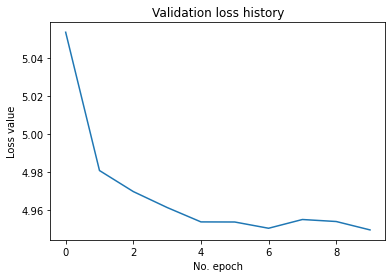

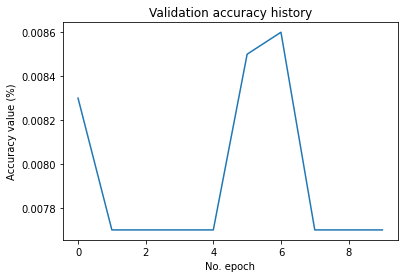

In [27]:
# Visualize history
# Plot history: Loss
plt.plot(history_s2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model with Data Augmentation**

In [28]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(input_train)

In [29]:
history_s3=model.fit_generator(datagen.flow(input_train, target_train, batch_size=128),
                    steps_per_epoch = len(input_train) / 128, epochs=20, validation_data=(input_test, target_test))

Epoch 1/20
391/390 [==============================] - 83s 213ms/step - loss: 3.0542 - accuracy: 0.2456 - val_loss: 2.9763 - val_accuracy: 0.2658
Epoch 2/20
391/390 [==============================] - 84s 214ms/step - loss: 3.0139 - accuracy: 0.2526 - val_loss: 2.9517 - val_accuracy: 0.2755
Epoch 3/20
391/390 [==============================] - 83s 213ms/step - loss: 2.9794 - accuracy: 0.2608 - val_loss: 2.9995 - val_accuracy: 0.2667
Epoch 4/20
391/390 [==============================] - 83s 212ms/step - loss: 2.9449 - accuracy: 0.2684 - val_loss: 2.8777 - val_accuracy: 0.2883
Epoch 5/20
391/390 [==============================] - 82s 211ms/step - loss: 2.9048 - accuracy: 0.2741 - val_loss: 2.8618 - val_accuracy: 0.2905
Epoch 6/20
391/390 [==============================] - 86s 219ms/step - loss: 2.8814 - accuracy: 0.2808 - val_loss: 2.9335 - val_accuracy: 0.2785
Epoch 7/20
391/390 [==============================] - 84s 214ms/step - loss: 2.8501 - accuracy: 0.2853 - val_loss: 2.8916 - val_ac

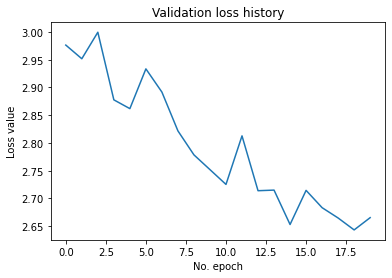

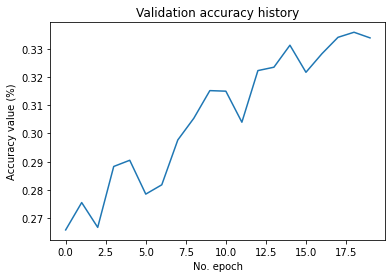

In [31]:
# Visualize history
# Plot history: Loss
plt.plot(history_s3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_s3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Compare Models**

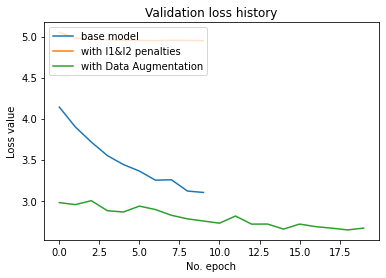

In [35]:
# Plot history: Loss
plt.plot(history_s1.history['val_loss'])
plt.plot(history_s2.history['val_loss'])
plt.plot(history_s3.history['val_loss'])

plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()

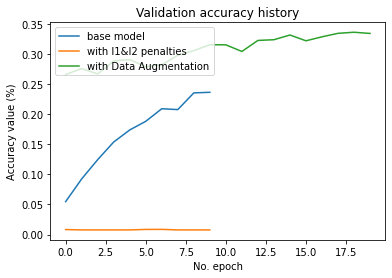

In [34]:
# Plot history: Accuracy
plt.plot(history_s1.history['val_accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.plot(history_s3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model','with l1&l2 penalties','with Data Augmentation'], loc='upper left')
plt.show()